<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho_final/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passos requeridos para o trabalho:
- Abrir o conjunto de dados em um DataFrame, 
- Visualizar os dados por meio de gráficos construídos com uma das bibliotecas gráficas vistas na disciplina,
- Utilizar aprendizado de máquina não supervisionado e/ou supervisionado para construir um modelo que seja capaz de prever uma propriedade de interesse.

In [282]:
#https://www.openml.org/

dataset = 'credit-g'
from sklearn.datasets import fetch_openml
risk_dataset = fetch_openml(name=dataset,version='1')
print(risk_dataset.data.shape)

(1000, 20)


In [283]:
print(risk_dataset.DESCR)

**Author**: Dr. Hans Hofmann  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)

**German Credit dataset**  
This dataset classifies people described by a set of attributes as good or bad credit risks.

This dataset comes with a cost matrix: 
``` 
Good  Bad (predicted)  
Good   0    1   (actual)  
Bad    5    0  
```

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  

### Attribute description  

1. Status of the existing checking account, in Deutsche Mark.  
2. Duration in months  
3. Credit history (credits taken, paid back duly, delays, critical accounts)  
4. Purpose of the credit (car, television,...)  
5. Credit amount  
6. Status of savings account/bonds, in Deutsche Mark.  
7. Present employment, in number of years.  
8. Installment rate in percentage of disposable income  
9. P

In [284]:
import pandas as pd
df = pd.DataFrame(risk_dataset.data)
df.columns = risk_dataset.feature_names
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [285]:
# Converter target para valores numéricos

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# categories = risk_dataset.target.unique()
# encoder.fit(categories)
target = encoder.fit_transform(risk_dataset.target)
target


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [286]:
# Converter dados para valores numéricos

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data = encoder.fit_transform(risk_dataset.data)
data

array([[ 1.,  2.,  1., ...,  0.,  1.,  1.],
       [ 0., 29.,  3., ...,  0.,  0.,  1.],
       [ 3.,  8.,  1., ...,  1.,  0.,  1.],
       ...,
       [ 3.,  8.,  3., ...,  0.,  0.,  1.],
       [ 1., 27.,  3., ...,  0.,  1.,  1.],
       [ 0., 27.,  1., ...,  0.,  0.,  1.]])

In [287]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.46, -1.56, -1.15, ..., -0.43,  1.21,  0.2 ],
       [-1.26,  2.03,  0.73, ..., -0.43, -0.82,  0.2 ],
       [ 1.13, -0.76, -1.15, ...,  2.33, -0.82,  0.2 ],
       ...,
       [ 1.13, -0.76,  0.73, ..., -0.43, -0.82,  0.2 ],
       [-0.46,  1.77,  0.73, ..., -0.43,  1.21,  0.2 ],
       [-1.26,  1.77, -1.15, ..., -0.43, -0.82,  0.2 ]])

In [288]:
df = pd.DataFrame(data)
df.columns = risk_dataset.feature_names
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,-0.464594,-1.558464,-1.146212,0.626481,-1.156695,1.669901,1.097762,0.918477,0.830971,0.301109,1.046987,1.333473,2.788510,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014
1,-1.262865,2.032467,0.734365,0.626481,1.217641,-0.130531,-1.134975,-0.870183,-1.390876,0.301109,-0.765977,1.333473,-1.197733,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
2,1.131948,-0.760479,-1.146212,-1.026504,-0.219059,-0.130531,-0.390729,-0.870183,0.830971,0.301109,0.140505,1.333473,1.194013,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014
3,-0.464594,1.633475,0.734365,-0.613257,1.512543,-0.130531,-0.390729,-0.870183,0.830971,-1.945974,1.046987,-0.318910,0.839680,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014
4,-0.464594,0.436498,-0.205923,-0.200011,1.081533,-0.130531,-1.134975,0.024147,0.830971,0.301109,1.046987,0.507281,1.548345,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.131948,-0.760479,0.734365,-0.613257,-0.521522,-0.130531,-0.390729,0.024147,-1.390876,0.301109,1.046987,1.333473,-0.400485,0.218346,-0.133710,-0.704926,1.824516,-0.428290,-0.823318,0.196014
996,-0.464594,0.968487,0.734365,1.866220,0.805535,-0.130531,-1.134975,0.918477,-0.650260,0.301109,1.046987,-0.318910,0.396764,0.218346,-0.133710,-0.704926,-1.346717,-0.428290,1.214598,0.196014
997,1.131948,-0.760479,0.734365,0.626481,-1.432692,-0.130531,1.097762,0.918477,0.830971,0.301109,1.046987,-1.145101,0.219598,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
998,-0.464594,1.766472,0.734365,0.626481,-0.438345,-0.130531,-1.134975,0.918477,0.830971,0.301109,1.046987,0.507281,-1.109150,0.218346,-2.016956,-0.704926,-0.289639,-0.428290,1.214598,0.196014


In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier(n_neighbors=5)
knn = GridSearchCV(clf,{'n_neighbors':range(1,9)},cv=30)
knn.fit(data,target)
print(knn.score(data,target))
print(knn.best_params_)

0.809
{'n_neighbors': 5}


In [290]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(data,target)
print(clf.score(data,target))
print(clf.predict_proba(data))

0.809
[[0.  1. ]
 [0.4 0.6]
 [0.2 0.8]
 ...
 [0.  1. ]
 [0.4 0.6]
 [0.2 0.8]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
X_train, X_test, y_train, y_test

In [292]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [293]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 26  48]
 [ 29 147]]
Normalized confusion matrix
[[0.35 0.65]
 [0.16 0.84]]


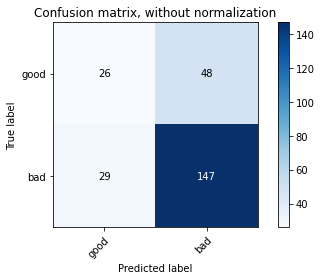

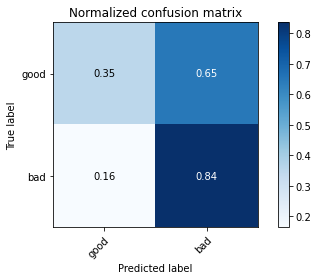

In [294]:
class_names = risk_dataset.target.unique()

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [295]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data,target)
print(lda.score(data,target))
print(lda.predict_proba(data))
print(lda.explained_variance_ratio_)


0.728
[[0.07 0.93]
 [0.72 0.28]
 [0.09 0.91]
 ...
 [0.11 0.89]
 [0.46 0.54]
 [0.6  0.4 ]]
[1.]


In [296]:
y_pred = lda.fit(X_train, y_train).predict(X_test)


Confusion matrix, without normalization
[[ 30  44]
 [ 30 146]]
Normalized confusion matrix
[[0.41 0.59]
 [0.17 0.83]]


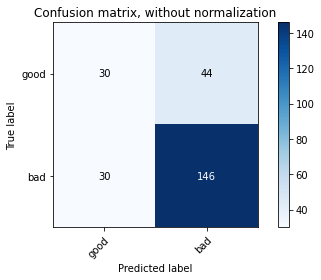

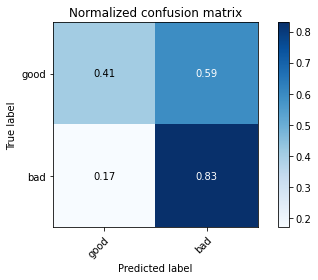

In [298]:
y_pred = lda.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
# class_names = target_names
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [299]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(data,target)
print(qda.score(data,target))
print(qda.predict_proba(data))


0.775
[[0.01 0.99]
 [0.88 0.12]
 [0.04 0.96]
 ...
 [0.04 0.96]
 [0.8  0.2 ]
 [0.23 0.77]]


Confusion matrix, without normalization
[[ 40  34]
 [ 44 132]]
Normalized confusion matrix
[[0.54 0.46]
 [0.25 0.75]]


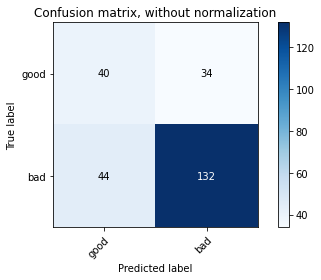

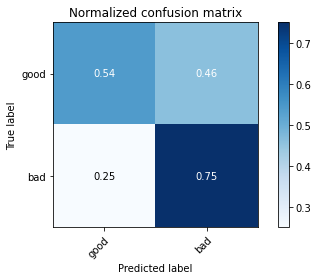

In [300]:

y_pred = qda.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [301]:
from sklearn.svm import SVC
svc = SVC(gamma="scale")
svc.fit(data,target)
print(svc.score(data,target))
print(svc.predict(data))

0.844
[1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 

Confusion matrix, without normalization
[[ 22  52]
 [ 14 162]]
Normalized confusion matrix
[[0.3  0.7 ]
 [0.08 0.92]]


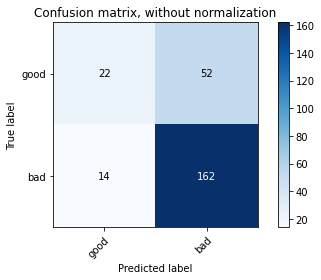

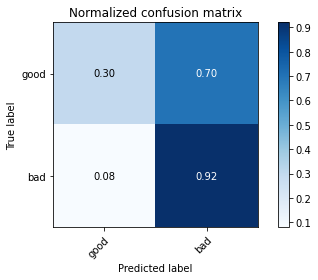

In [302]:
y_pred = svc.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
